<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Johannah, my name is Dmitrii. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Once again you achieved a very high level of the project! 

Nevertheless, there are some comments/areas that will help you to make your project even better and should be fixed before this project can be accepted:
- Update graphs
- Check mean sales per genre.
- Use the dataset with the latest platform generation in the rest of the project.
 
Of course, it will be amazing if you have time to check also yellow comments :)
I will wait for the new version of the project. Come back soon! 

And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Hello Johannah,  thank you for going an extra mile and making changes in your project.

Now everything is perfect. No critial issues left, so your project has been accepted!
    
Wish you cool projects in the next sprints! ☘️   

## Intitialization

Ice is an online store which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. From this data set my objective is to analyze the data and determine what could help a campaign in 2017 be successful. I will identify patterns that determine whether a game succeeds or not. This information will allow me to help spot potential big winners and plan advertising campaigns. 

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature. Data from 2016 may be incomplete

I will start by inspecting the data and cleaning it up depending on what I find. Then I will add any information based on the original data, potentially adding columns that would aide my anaylsis, then I will analyze the data utilizing data visualizations to make my conclusions clear. Then I will test the hypothesis that Ice would like me to test and draw conclusions from there. 

Thank you for your time reviewing my project! 

### Import Data and Libraries

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal. Could be also helpful to share steps you will complete.

</div>

First I will import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib as plt

Now I will look at the dataset itself

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
I can advice to use `try-except` to validate data importing in the following way: 
    
    try: # Reed the dataset
    r_data = pd.read_csv('games.csv')
    except:
    r_data = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Data Preprocessing

### Columns

I will replace the column names (make them lowercase).

In [5]:
df.columns=map(str.lower, df.columns)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Missing Values

In [7]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! Here indeed could be easier to delete missing data.


I will drop these two rows from the data as they are missing most of their data

In [8]:
df=df.drop([659,14244])

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


now I will replace missing values in year of release by the mode of other games with that name 

In [10]:
f = lambda x: x.mode(dropna=False).iloc[0]
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform(f))

In [11]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T


In [12]:
df[df['year_of_release'].isna()]['name'].value_counts()

LEGO Harry Potter: Years 5-7                          7
Rock Band                                             4
Happy Feet Two                                        4
WRC: FIA World Rally Championship                     3
Test Drive Unlimited 2                                3
                                                     ..
Twisted Metal: Small Brawl                            1
Disney's Cinderella: Magical Dreams                   1
Wii de Asobu: Metroid Prime                           1
The Chronicles of Riddick: Escape from Butcher Bay    1
Hangman                                               1
Name: name, Length: 142, dtype: int64

I will leave the remaining NaN in the year_of_release column, these will not greatly impact my analysis

### Changing Data Types


Now I will convert the data to the appropriate dtypes. Critic score NaN will be replaced with 0 to represent a missing score numerically. I will then change the dtype to int as it will be better for my analysis

In [13]:
df['critic_score'] = df['critic_score'].fillna(0).astype('int')

for user score I will replace the 'tbd' string with 0 to represent a pending score. I will use 0 again for the NaN. Now the dtype can be changed from object to float.

In [14]:
df['user_score']=df['user_score'].replace('tbd', 0).fillna(0).astype('float64')

In [15]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [16]:
df['user_score'].value_counts()

0.0    9124
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
0.6       2
1.0       2
1.5       2
9.6       2
9.7       1
Name: user_score, Length: 95, dtype: int64

I will set the 'tbd' to 0 to represent a score coming in the future. Then I will change the dtype to float.

In [17]:
df[df['user_score']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,0.0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN


In [18]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


I will fill the missing ratings with a new category 'NA', not assigned

In [19]:
df['rating'] = df['rating'].fillna('NA')

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
   
    
You did a great job of restoring missing values. Regarding the rating column, the unknown value contains valuable information in itself, so any placeholder could be indeed used to fill it.
    


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16540 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Total Sales Column

I will calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column 'total_sales'.

In [21]:
df= df.eval('total_sales = na_sales+eu_sales+jp_sales+other_sales')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Great, everything is correct here. 

Btw you can also achieve the same by using 

    df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [22]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,0.0,NA,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NA,31.38


## Data Analysis

### Range

To start my analysis I will look at how many games were released in different years. I will use this to help me choose a range to work with. 

''

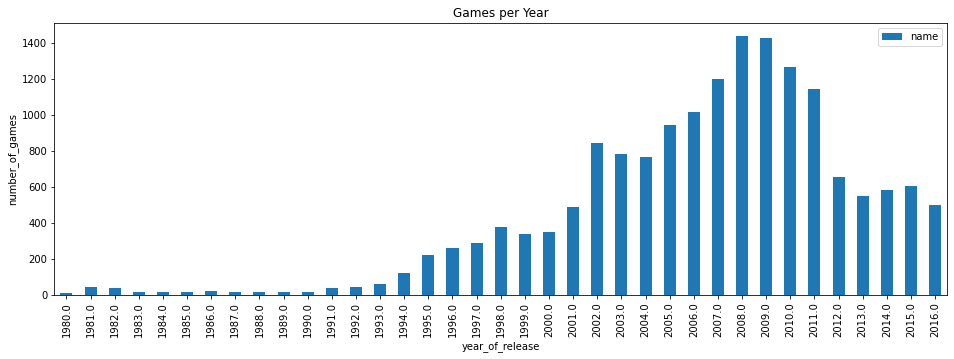

In [23]:
pd.pivot_table(df, index = 'year_of_release', values = 'name', aggfunc='count').plot(kind='bar',ylabel= 'number_of_games',figsize=(16, 5), title='Games per Year')
;

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Could you please add axis labels and title to all graphs and make it a little bit bigger with `figsize=(16, 5)`




<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

👏👏

overtime we see a huge increase in game releases starting in 1994, peaking in 2008 at 1400 games released that year and then settling around five hundred to six hundred per year from 2012-2016. Because my main goal is to assist in forecasting the next year I will filter my data to use from 1994-2016. These data are more reliable and more useful in terms of predicting the future 2017 outcomes. 

In [24]:
df= df.query('year_of_release >= 1994')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16175 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16175 non-null  object 
 1   platform         16175 non-null  object 
 2   year_of_release  16175 non-null  float64
 3   genre            16175 non-null  object 
 4   na_sales         16175 non-null  float64
 5   eu_sales         16175 non-null  float64
 6   jp_sales         16175 non-null  float64
 7   other_sales      16175 non-null  float64
 8   critic_score     16175 non-null  int64  
 9   user_score       16175 non-null  float64
 10  rating           16175 non-null  object 
 11  total_sales      16175 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Yes, looks like there were almost no games before 1994.


Next I will look at how sales varied from platform to platform. I will do this my grouping the data by platform and then adding the total sales from each platform.

In [25]:
print(df.groupby('platform')['total_sales'].sum().sort_values(ascending=False))

platform
PS2     1247.16
X360     964.13
PS3      932.73
Wii      902.00
DS       803.16
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.30
3DS      258.13
XB       256.33
PC       255.51
N64      218.48
GC       198.36
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
2600       2.53
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64


In [26]:
np.std(df)

year_of_release     5.132018
na_sales            0.714501
eu_sales            0.507129
jp_sales            0.281447
other_sales         0.188957
critic_score       35.865994
user_score          3.697653
total_sales         1.467368
dtype: float64

In [27]:
np.var(df)

year_of_release      26.337607
na_sales              0.510512
eu_sales              0.257180
jp_sales              0.079213
other_sales           0.035705
critic_score       1286.369511
user_score           13.672637
total_sales           2.153170
dtype: float64

### Dictionaries 

Now I will make some dictionaries to help me visualize the data for various platform ranges based on their total_sales

In [28]:
pro_plat=['X360','PS2']
old_plat=['PCFX','3DO','NES','TG16','WS','NG','SCD']
low_mid =['DC','GEN','SAT','PSV','WiiU','2600']
top_mid=['XOne','GC','SNES','N64','NES','GB','XB','3DS','PC','PSP']
top_seven=['PS','DS','Wii','PS3','X360','PS2','PS4']
PS=['PS2','PS3','PS','PS4','PSP','PSV']

In [29]:
old_plat_df=df[df['platform'].isin(old_plat)]

### Platform Sales Over Time

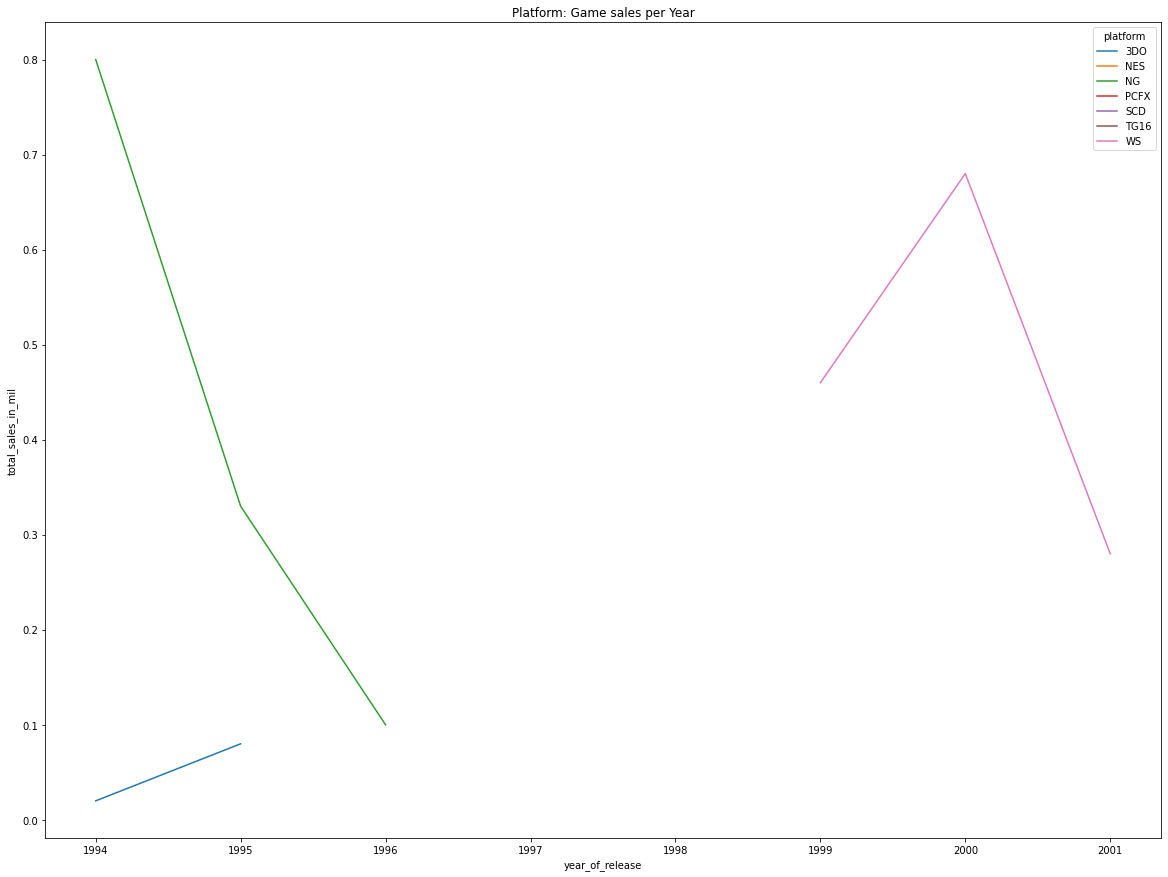

In [30]:
y = old_plat_df.pivot_table(index='year_of_release',columns='platform',values='total_sales', aggfunc='sum').plot.line(figsize=(20,15), ylabel='total_sales_in_mil',title='Platform: Game sales per Year')


clearly we are missing data for year of release here for many of these platforms

In [31]:
low_mid_df = df[df['platform'].isin(low_mid)]

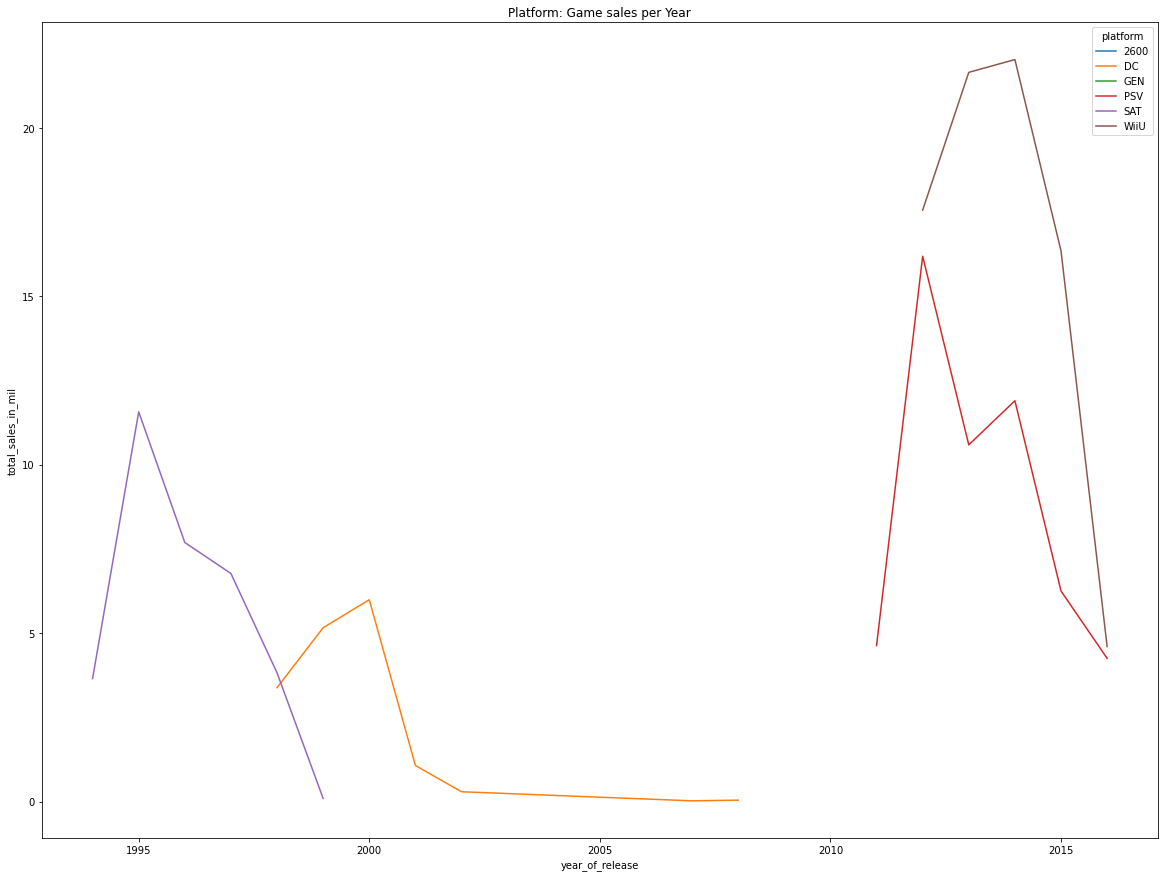

In [32]:
y = low_mid_df.pivot_table(index='year_of_release',columns='platform',values='total_sales', aggfunc='sum').plot.line(figsize=(20,15), ylabel='total_sales_in_mil',title='Platform: Game sales per Year')

I am seeing a trend here where the platforms are rapidly popular for two years and then sales taper off.

In [33]:
top_seven_df = df[df['platform'].isin(top_seven)]


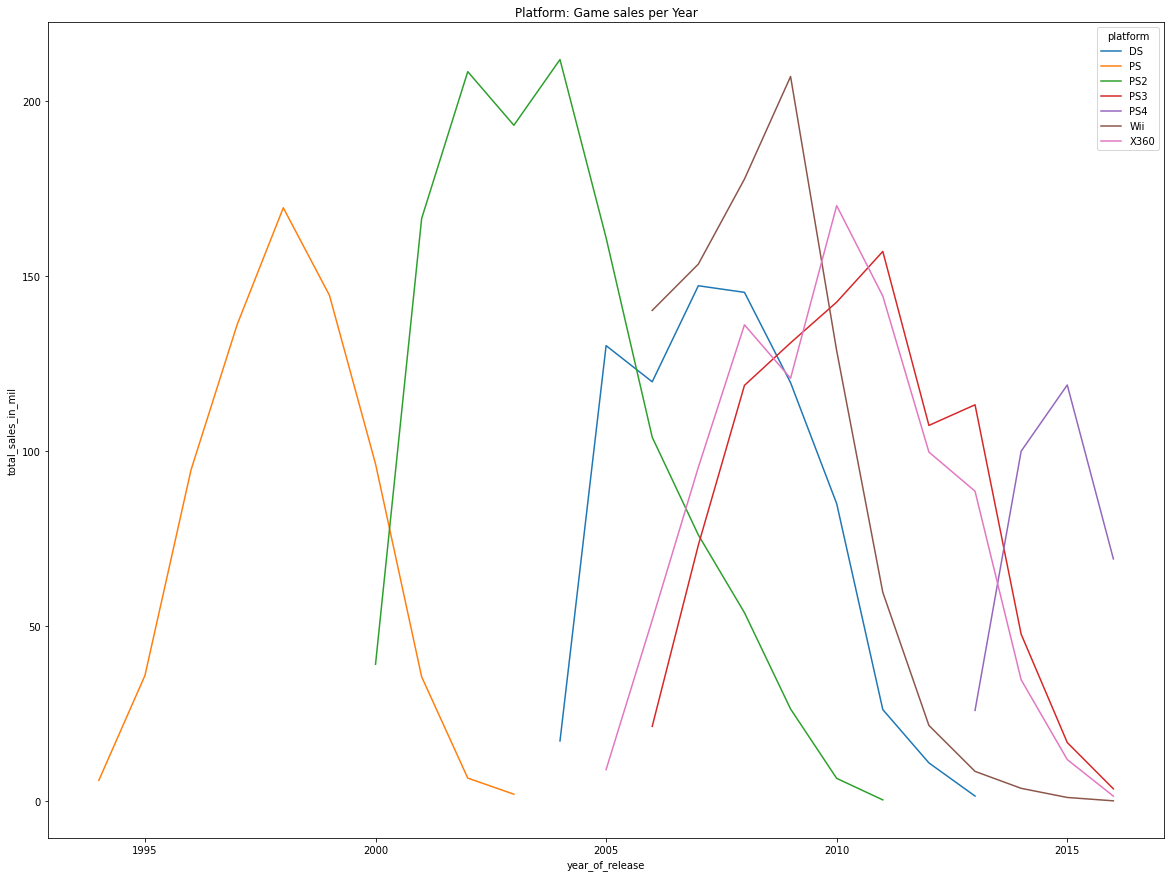

In [34]:
y = top_seven_df.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot.line(figsize=(20,15), ylabel='total_sales_in_mil', title='Platform: Game sales per Year')

I can see the same trend again here. A platform will peak in popularity 2-3 years after its release and then taper off in the following 5-10 years

lets look at play station platforms 

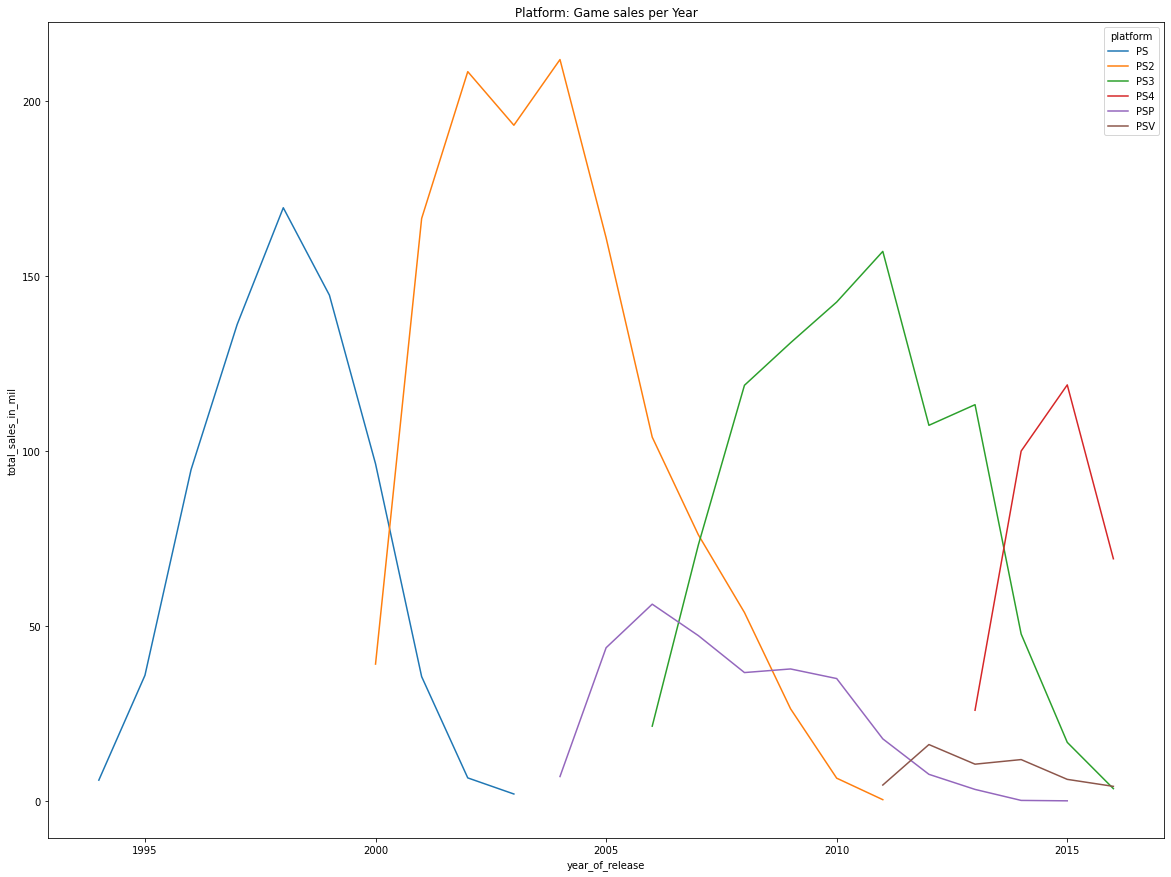

In [35]:
ps_df=df[df['platform'].isin(PS)]
y = ps_df.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot.line(figsize=(20,15), ylabel='total_sales_in_mil', title='Platform: Game sales per Year')

looking specifically at playstation platforms here it is clear that their console devices out performed their hand held devices. There is also a clear trend as noted above with sales peaking and dropping off 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
That is a nice way to check platform life cycle.

We can see that only a small subset of platform still has sales.

### Potentially Profitable Platforms

The XboxOne, and the PS4 are likely to be profitable potentially because they are big new platforms, people are likely to buy from these big brands. I would like to look at N64 as a control because it is and old platform that has largely died off. 

''

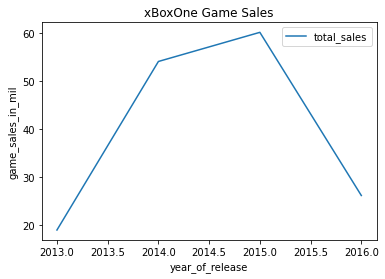

In [36]:
xone=df.query('platform=="XOne"')
pd.pivot_table(xone, index='year_of_release',values='total_sales', aggfunc='sum').plot(ylabel='game_sales_in_mil', title='xBoxOne Game Sales')
;

''

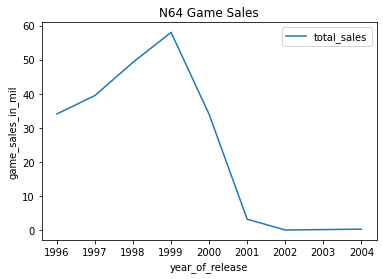

In [37]:
N64=df.query('platform=="N64"')
pd.pivot_table(N64, index='year_of_release',values='total_sales', aggfunc='sum').plot(ylabel='game_sales_in_mil', title= 'N64 Game Sales')
;

''

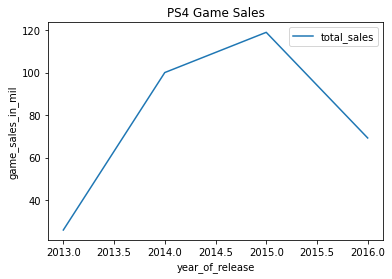

In [38]:
PS4=df.query('platform=="PS4"')
pd.pivot_table(PS4, index='year_of_release',values='total_sales', aggfunc='sum').plot(ylabel='game_sales_in_mil', title= 'PS4 Game Sales')
;

In [39]:
bottom_df = df[df['platform'].isin(old_plat)]


In [40]:
pd.pivot_table(bottom_df, index=['platform','year_of_release'], values='total_sales', aggfunc='mean')

total_sales
platform year_of_release             
3DO      1994.0                0.0200
         1995.0                0.0400
NES      1994.0                0.1100
NG       1994.0                0.2000
         1995.0                0.0825
         1996.0                0.0500
PCFX     1996.0                0.0300
SCD      1994.0                0.0720
TG16     1995.0                0.0800
WS       1999.0                0.2300
         2000.0                0.3400
         2001.0                0.1400

These consoles seem to have missed the mark for the popularity of video games

''

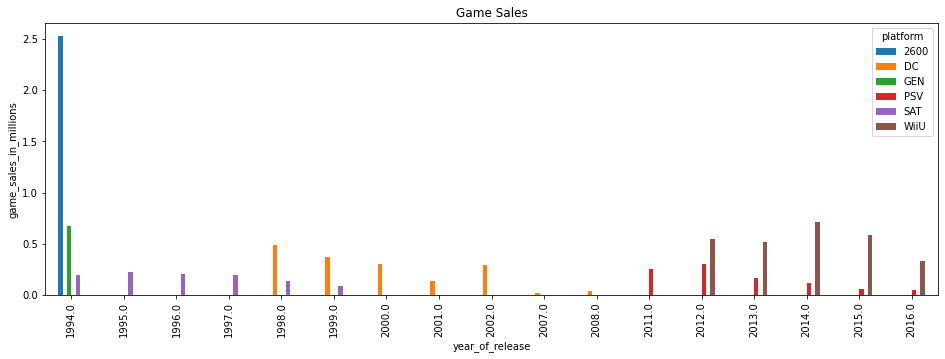

In [41]:
pd.pivot_table(low_mid_df, index=['year_of_release'], columns=['platform'],
               values='total_sales', aggfunc='mean').plot.bar(ylabel='game_sales_in_millions', title='Game Sales', figsize=[16,5])
;

In [42]:
top_mid_df = df[df['platform'].isin(top_mid)]

''

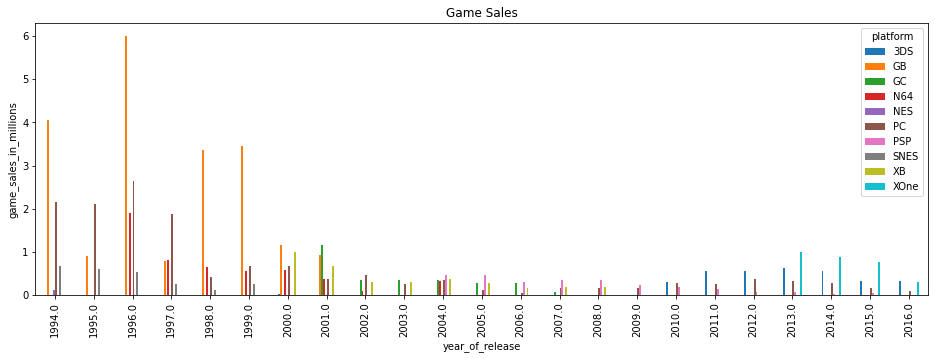

In [43]:
pd.pivot_table(top_mid_df, index=['year_of_release'], columns=['platform'],
               values='total_sales', aggfunc='mean').plot.bar(ylabel='game_sales_in_millions',title='Game Sales', figsize=[16,5])
;


you can see the popularity of the early hand held device games here.

Because my goal is to help forcast 2017 I will look only at the last 4 years and the most recent platroms to help me do that

In [44]:
relevant= ['PS4', 'XOne', '3DS', 'PS', 'PSP', 'WiiU']

df_relevant = df.loc[(df['platform'].isin(relevant)) & (df['year_of_release'] >= 2013)]                  



<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Everything is correct and data has been filtered correctly.

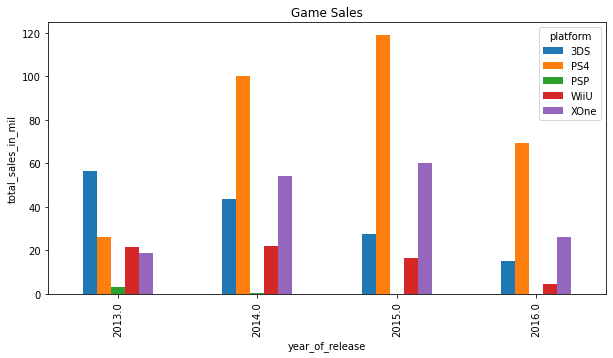

In [45]:
y = df_relevant.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot.bar(figsize=(10,5), ylabel='total_sales_in_mil', title= 'Game Sales')

according to this graph and looking at the trend, it seems that the PS4 and XboxOne are the most grossing platforms. However they may have peaked and are starting to loose profitability, according to the down turn in 2016, also this loss may be due to incomplete records from 2016

''

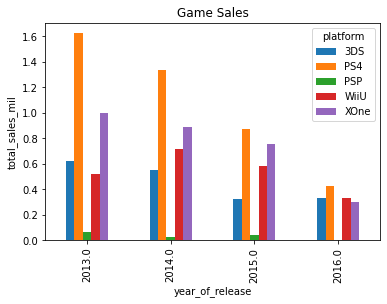

In [46]:
pd.pivot_table(df_relevant , index=['year_of_release'],columns=['platform'], values='total_sales', aggfunc='mean').plot.bar(ylabel='total_sales_mil',title= 'Game Sales')
;

looks like the psp is fading out, the 3DS is the only platform that increased over the 4 year time frame

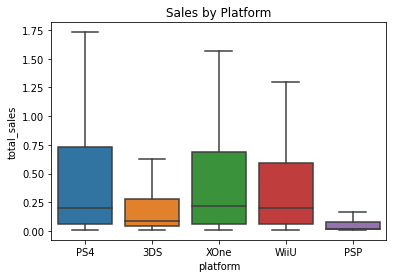

In [47]:
platform_sales= pd.pivot_table(df_relevant, index= 'platform', values='total_sales', aggfunc='sum').reset_index()
ax=sns.boxplot(x='platform',y='total_sales',data=df_relevant, showfliers = False).set(title='Sales by Platform')

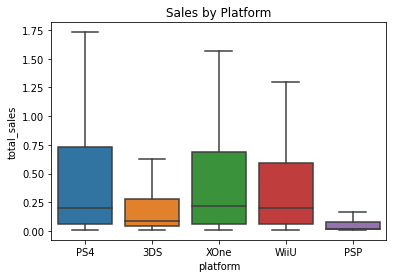

In [48]:
platform_sales= pd.pivot_table(df_relevant, index= 'platform', values='total_sales', aggfunc='mean').reset_index()
ax=sns.boxplot(x='platform',y='total_sales',data=df_relevant, showfliers = False).set(title='Sales by Platform')

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It  is better to remove outliers to make the plot more informative, you can do it using the argument showfliers = False.
    
You can also limit upper outliers on the boxplot with ylim=(0, ...).

Similar IQR between PS4, XOne, and WiiU platforms, they are the current top performers. There is not a notable difference between the total vs avg boxplots

### Reviews

lets look into how userscore and critic score effect the sales of Playstation games

In [49]:
PS=['PS2','PS3','PS','PS4','PSP','PSV']

In [50]:
playstation = df_relevant[df_relevant["platform"].isin(PS)].dropna()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>
 
A few lines above, you have filtered your data. Can you please use this dataframe (df_relevant) in the rest of the project, so we can be sure that we are analyzing the latest data?

In [51]:
PS_scores=playstation.loc[(playstation[['user_score', 'critic_score']] != 0).all(axis=1)]

''

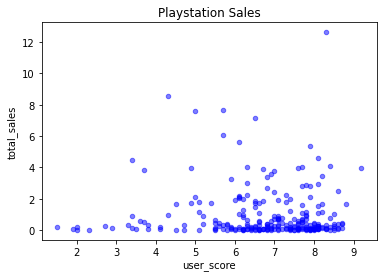

In [52]:
PS_scores.plot(x='user_score', y='total_sales', kind='scatter', title='Playstation Sales', color='blue', alpha= .5)
;

''

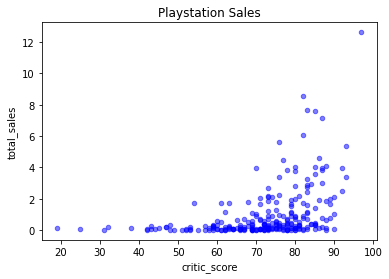

In [53]:
PS_scores.plot(x='critic_score', y='total_sales', kind='scatter', title='Playstation Sales', color='blue',alpha=.5)
;

We can see a little dependance in these plots showing that the higher the score the higher the sales in general. Both graphs are skewed right. Lets look at a coorelation matrix to check the coefficients  

In [54]:
PS_scores[['user_score', 'critic_score', 'total_sales']].corr().style.background_gradient(cmap=sns.light_palette("purple", as_cmap=True))

,user_score,critic_score,total_sales
user_score,1.000000,0.556999,-0.035684
critic_score,0.556999,1.000000,0.405368
total_sales,-0.035684,0.405368,1.000000


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots.


according to the matrix it does not appear that there is a strong correlation beween critic and user scores and sales of games.

### Games

In [55]:
top_ten_games=pd.pivot_table(df_relevant, index='name', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False).head(10)

In [56]:
top_ten_games

,total_sales
name,
Call of Duty: Black Ops 3,22.02
Grand Theft Auto V,18.09
Pokemon X/Pokemon Y,14.60
Call of Duty: Advanced Warfare,12.92
Super Smash Bros. for Wii U and 3DS,12.42
FIFA 16,11.83
Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
Star Wars Battlefront (2015),11.64
Fallout 4,11.39


These are the top 10 grossing games of the ice database. 

''

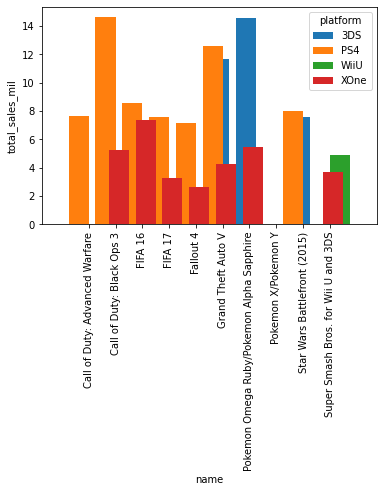

In [57]:
pd.pivot_table(df_relevant[df_relevant["name"].isin(top_ten_games.index)], values = 'total_sales', index = 'name',
               columns = 'platform',aggfunc ='sum').plot.bar(width=3, ylabel='total_sales_mil')
;

I am looking for a candidate for looking at sales of the same game across different platforms. I think 'New Super Mario Bros'could be a good candidate

In [58]:
GTA5=df_relevant[df_relevant["name"]=="Grand Theft Auto V"]


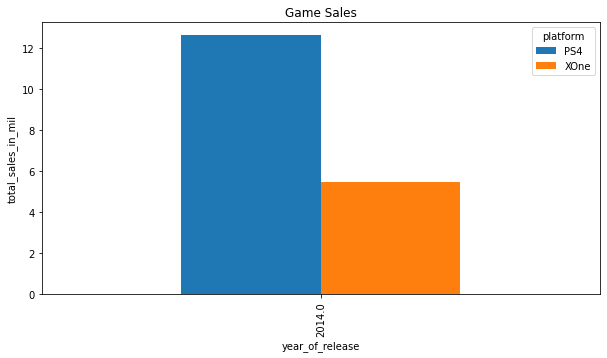

In [59]:
y = GTA5.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot.bar(figsize=(10,5), ylabel='total_sales_in_mil', title='Game Sales')


In [60]:
CDBO3=df_relevant[df_relevant["name"]=="Call of Duty: Black Ops 3"]

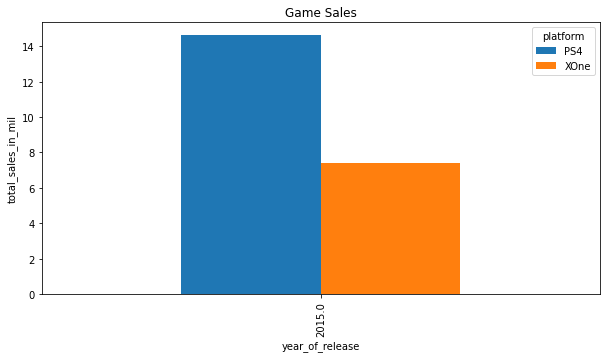

In [61]:
y =CDBO3.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot.bar(figsize=(10,5), ylabel='total_sales_in_mil',title='Game Sales')


In [62]:
SSB=df_relevant[df_relevant["name"]=="Super Smash Bros. for Wii U and 3DS"]

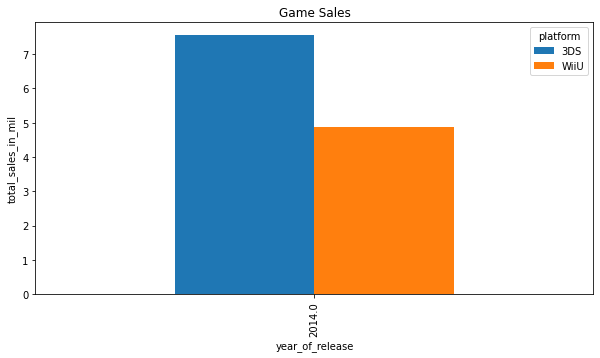

In [63]:
y = SSB.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot.bar(figsize=(10,5), ylabel='total_sales_in_mil',title='Game Sales')


Again we can see our top performers are PS4 and Xone, there is little overlap in games for nintendo consoles and games for xbox and playstation consoles. 

### Genre

''

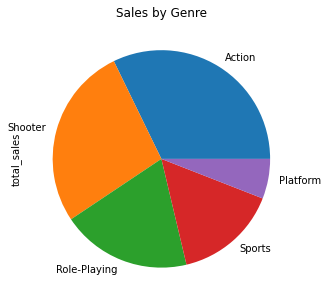

In [64]:
genre = (df_relevant
            .pivot_table(index="genre", aggfunc='sum')
            .sort_values("total_sales", ascending=False)
            .head(5))
genre.plot(kind='pie', y="total_sales", figsize=(12, 5), legend=False).set(label=genre.index, ylabel='total_sales', title= 'Sales by Genre')
;

overall we can see that action is the highest grossing genre, sports, and role-playing are equally destributed

''

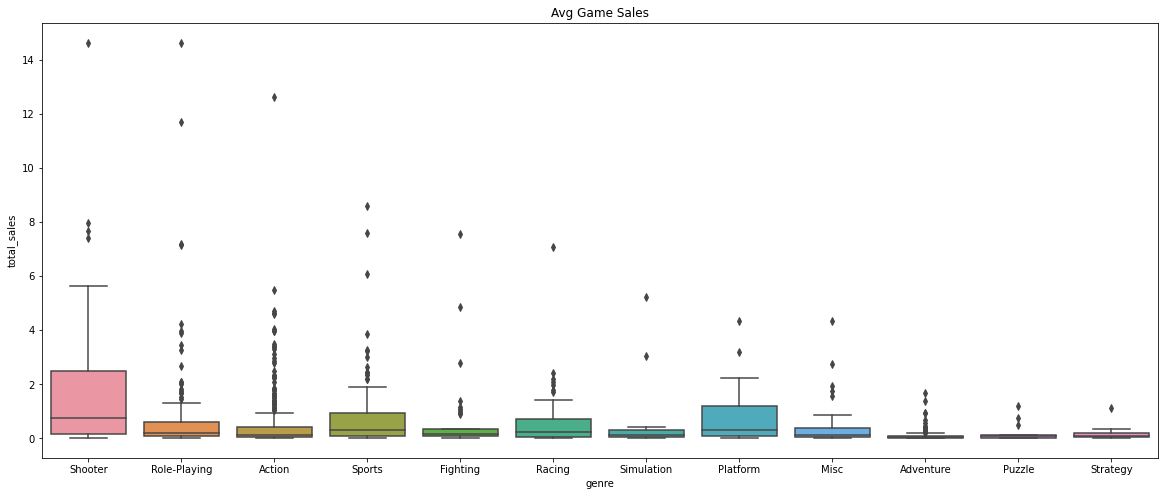

In [65]:
genre_sales= pd.pivot_table(df_relevant, index= 'platform', values='total_sales', aggfunc='sum').reset_index()
plt.pyplot.figure(figsize=[20,8])
ax=sns.boxplot(x='genre',y='total_sales',data=df_relevant).set(title= 'Avg Game Sales')
;


we can see here that some major outliers may be skewing the data and some very popular games in specific genres is causing a higher proportion in our pie chart

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

Great that you checked sum sales per genre. But can you please additionally check mean sales and create a boxplot with mean sales per genre. Boxplot helps a lot to see outliers in the data and why we see such discrepancy. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Well done! That looks nice and as you can see shooters appeared to be more profitable on average.

## Regional profiles

Now I will build profiles by region

I will make a function that will help me in this process, this function will take the top 5 of either the platform, the genre, or the rating and make a bar plot for it. 

In [66]:
def plot_top_sales_by_region_barplot(df, column, region, n=5):
    data = (df
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(n)).reset_index()
    sns.barplot(y=data[column], x=data[region], data=data, label="sales").set(title= region)
    ;

### USA Profile

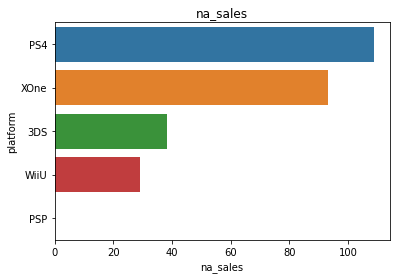

In [67]:
plot_top_sales_by_region_barplot(df_relevant, 'platform', region = 'na_sales')

PS4 is the most popular console in the USA. 

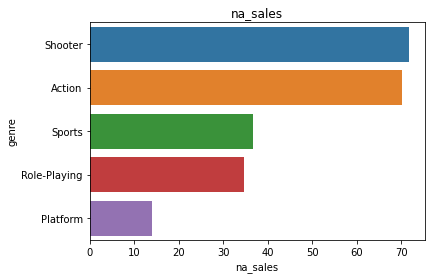

In [68]:
plot_top_sales_by_region_barplot(df_relevant, 'genre', region = 'na_sales')

shooter is the top genre in the USA

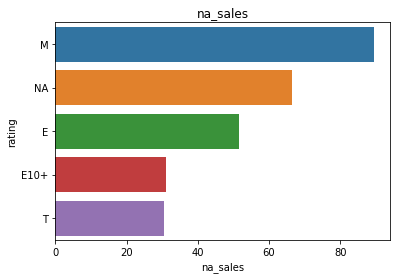

In [69]:
plot_top_sales_by_region_barplot(df_relevant, 'rating', region = 'na_sales')

most games are rated M for mature in the USA

### Europe Profile

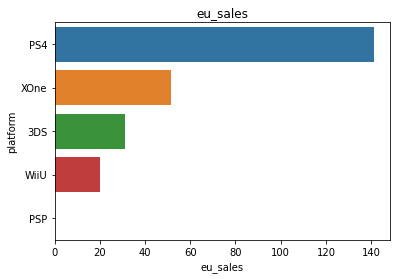

In [70]:
plot_top_sales_by_region_barplot(df_relevant, 'platform', region = 'eu_sales')

in the Europe the PS4 is the most popular

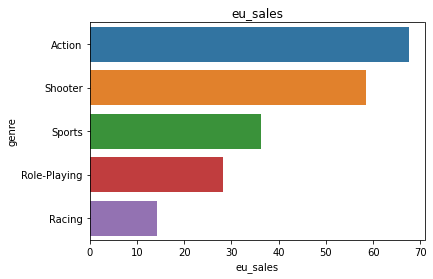

In [71]:
plot_top_sales_by_region_barplot(df_relevant, 'genre', region = 'eu_sales')

action is the top genre in Europe

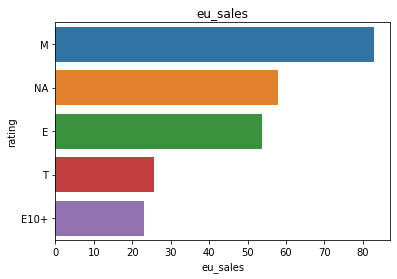

In [72]:
plot_top_sales_by_region_barplot(df_relevant, 'rating', region = 'eu_sales')

most games are rated M mature in Europe

### Japan Profile

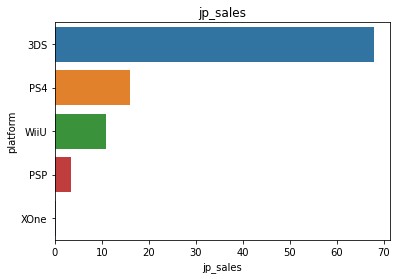

In [73]:
plot_top_sales_by_region_barplot(df_relevant, 'platform', region = 'jp_sales')

the Nintendo 3DS is the highest grossing platform in Japan 

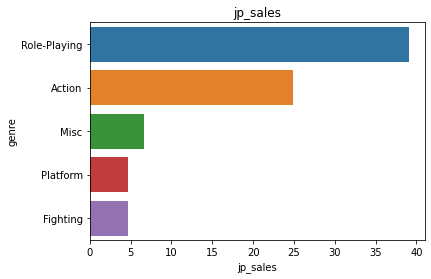

In [74]:
plot_top_sales_by_region_barplot(df_relevant, 'genre', region = 'jp_sales')

Roleplaying is the most popular genre in Japan

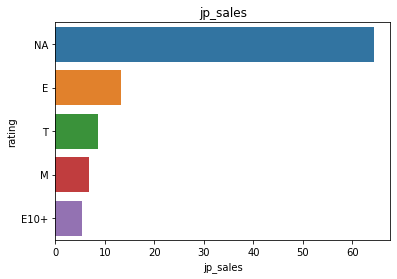

In [75]:
plot_top_sales_by_region_barplot(df_relevant, 'rating', region = 'jp_sales')

NA rating is the most common rating, maybe they use a different rating system in Japan?

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great! Everything is correct here.
You can also visualize data by using groupped pie charts. It provides a nice overview of all data. 
    
Great that you also added a proportion of unrated games per region, as this is quite an interesting information, especially for JP region.

## Hypothesis Testing
 I will be testing the following hypothesis: 

Average user ratings of the Xbox One and PC platforms are the same.
- this is a null hypothesis, that there is no difference between two outcomes. 
- the alternate will be that the user ratings between the two platfors

Average user ratings for the Action and Sports genres are different.
- this is an alternate hypothesis
- the null hypothesis will be that the user ratings are the same for action and for sports
The alpha threshold will be set to 0.05.

### Test 1:Average user ratings of the Xbox One and PC platforms are the same.

In [76]:
alpha=0.05

In [77]:
H_0 = "Average user ratings of the Xbox One and PC platforms are the same."
H_1 = "Average user ratings of the Xbox One and PC platforms are different."

pc = df[df["platform"] == 'PC']['user_score'].values
xbox = df[df["platform"].isin(["X360", "XOne", "XB"])]['user_score'].values

result = stats.ttest_ind(pc, xbox)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print(H_1)
else:
    print(H_0)
print("checking:")
print(f"pc mean={pc.mean()}")
print(f"xbox mean={xbox.mean()}")

pvalue: 0.0003491996707168678
Average user ratings of the Xbox One and PC platforms are different.
checking:
pc mean=5.607291666666667
xbox mean=5.1586042479410485


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2:</b>

Here you can also use df_relevant instead of the full dataset.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Great that you show not only p-values but also mean values of the samples.

### Test 2: Average user ratings for the Action and Sports genres are different.

In [78]:
action=df.query('genre == "Action"')
action_score=action['user_score']


In [79]:
sports=df.query('genre == "Sports"')
sports_score=sports['user_score']


In [80]:
H_0 = "Average user ratings for the Action and Sports genres are the same."
H_1 = "Average user ratings for the Action and Sports genres are different."

action = action_score
sports = sports_score

result = stats.ttest_ind(action, sports)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print(H_1)
else:
    print(H_0)
print("checking:")
print(f"action mean={action.mean()}")
print(f"sports mean={sports.mean()}")

pvalue: 2.075509074306796e-09
Average user ratings for the Action and Sports genres are different.
checking:
action mean=3.9376231527093597
sports mean=3.3381953569864216


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You did a great job! Hypotheses have been formulated and tested correctly.
    
   
You can also additionally compare the variances of the samples before testing hypotheses in order to understand with which equal_var parameter to use the ttest_ind test method (by default, True). In work, you accept it as True, while you do not justify your choice in any way. Here you can manually calculate variances, or use Levene's statistic test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Barlett's test (https: //docs.scipy .org / doc / scipy / reference / generated / scipy.stats.bartlett.html # scipy.stats.bartlett)

## Conclusion

Through rigorous data analysis techniques I have uncovered many useful facts about the current state of game sales across popular platforms that I think will be useful to Ice. 

- XboxOne and playstation4 are the current growing players in gaming platforms. 
- Platforms from the early 2000's have faded out and been replaced
- Most platforms have a lifespan of about 5 years, most peak in sales around 2 years and decline after that point
- A profile for each region was made, this will allow modifications of advertising strategies based on the differences in each market
- focusing on action and shooter games with an M rating would be a smart move according to sales represented here
- from the hypothesis tests we concluded that:
-- the average user rating from the xbox and the PC platforms are different 
-- the average user ratings for Action and Sports genres are different 

Thank you for your time reviewing this project! 


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Overall you conducted outstanding research with correct interim findings, clean code and nice visualisation.
I like your overall conclusion. It is very structured and provides insights from your analysis.

